📌 Para poder solucionar los ejercicios de hoy no solo tendremos que visualizar, también tendremos que usar métodos que hemos aprendido en lecciones anteriores de Pandas como por ejemplo value_counts(), isnull, describe, etc.

Tendréis que realizar gráficas para contestar a las siguientes preguntas:

1. ¿Cuál es la frecuencia de cada una de las categorías de la columna sex?

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [5]:
df = pd.read_csv('attacks_modificado.csv')
df.head()

,case_number,unnamed:_0,year,type,country,area,location,activity,name,sex_,age,time,species_,href
0,2018.06.25,0,2018.0,Boating,USA,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,F,57,18h00,White shark,http://sharkattackfile.net/spreadsheets/pdf_di...
1,2018.06.18,1,2018.0,Unprovoked,USA,Georgia,"St. Simon Island, Glynn County",Standing,Adyson McNeely,F,11,14h00 -15h00,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...
2,2018.06.09,2,2018.0,Invalid,USA,Hawaii,"Habush, Oahu",Surfing,John Denges,M,48,07h45,NaN,http://sharkattackfile.net/spreadsheets/pdf_di...
3,2018.06.08,3,2018.0,Unprovoked,AUSTRALIA,New South Wales,Arrawarra Headland,Surfing,male,M,NaN,NaN,2 m shark,http://sharkattackfile.net/spreadsheets/pdf_di...
4,2018.06.04,4,2018.0,Provoked,MEXICO,Colima,La Ticla,Free diving,Gustavo Ramos,M,NaN,NaN,"Tiger shark, 3m",http://sharkattackfile.net/spreadsheets/pdf_di...


In [28]:
df['sex_'].value_counts()

M      4939
F       619
M         2
N         2
lli       1
.         1
Name: sex_, dtype: int64

In [29]:
serie_cuentas = df['sex_'].value_counts()

In [32]:
serie_cuentas.index

Index(['M', 'F', 'M ', 'N', 'lli', '.'], dtype='object')

In [31]:
serie_cuentas.values

array([4939,  619,    2,    2,    1,    1])

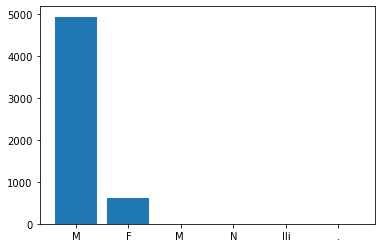

In [33]:
x = serie_cuentas.index
y = serie_cuentas.values

plt.figure()

plt.bar(x,y)

plt.show()

2. ¿Cuál es el porcentaje de nulos por columna? Usa un pie chart donde incluyáis el porcentaje de cada variable en el interior del quesito. Para eso tendréis que usar el parámetro autopct

In [40]:
df.isnull().sum()

case_number       1
unnamed:_0        0
year              0
type              4
country          40
area            408
location        488
activity        511
name            200
sex_            550
age            2666
time           3180
species_       2705
href              0
dtype: int64

In [42]:
y1 = df.isnull().sum().index

In [41]:
x1 = df.isnull().sum().values

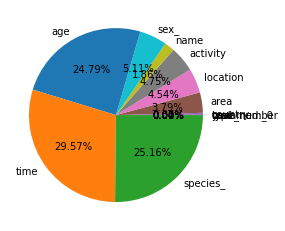

In [43]:
# Con el código más sencillo de los apuntes

plt.figure()
plt.pie(x1, labels=y1, autopct = '%1.2f%%')
plt.show()

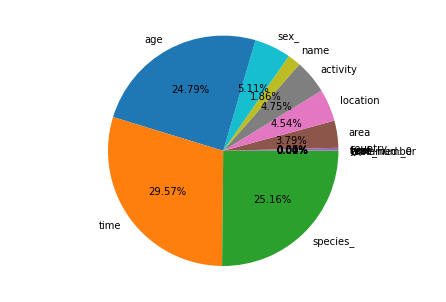

In [44]:
# Probando el codigo que ofrece la documentación, los resultados son muy similares
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
ax.pie(x1, labels = y1,autopct='%1.2f%%')
plt.show()

In [ ]:
# ver si podemos eliminar la superposicion de labels o eliminar los nulos de la serie serie[serie == 0] --> hacer un drop de esto

3. ¿Cuál es el número total de valores únicos de cada una de las columnas categóricas del DataFrame?

In [48]:
columnas = df.columns

In [50]:
df.describe(include ='all')

,case_number,unnamed:_0,year,type,country,area,location,activity,name,sex_,age,time,species_,href
count,6113,6114.000000,6114.000000,6110,6074,5706,5626,5603,5914,5564,3448,2934,3409,6114
unique,6113,NaN,NaN,8,201,791,4020,1484,5118,6,156,366,1529,6099
top,2018.06.25,NaN,NaN,Unprovoked,USA,Florida,"New Smyrna Beach, Volusia County",Surfing,male,M,17,Afternoon,White shark,http://sharkattackfile.net/spreadsheets/pdf_di...
freq,1,NaN,NaN,4438,2200,1025,162,966,511,4939,154,183,161,4
mean,NaN,3065.554629,1968.831207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,1769.652139,43.745920,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,0.000000,1801.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,1534.250000,1946.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,3066.500000,1980.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,4596.750000,2005.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
uniques = []
for column in columnas:
    v = df[column].count()
    uniques.append(v)

uniques

[6113,
 6114,
 6114,
 6110,
 6074,
 5706,
 5626,
 5603,
 5914,
 5564,
 3448,
 2934,
 3409,
 6114]